### Problem Statement

Boston house price prediction with Random Foresr Regression model

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
boston = datasets.load_boston()

In [4]:
features = pd.DataFrame(boston.data,
columns=boston.feature_names)

In [5]:
targets = boston.target

In [53]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,2.31,0.0,0.538,6.575,-0.120013,0.140214,1.0,296.0,15.3,0.441052,4.98
1,-0.417339,-0.487722,7.07,0.0,0.469,6.421,0.367166,0.557160,2.0,242.0,17.8,0.441052,9.14
2,-0.417342,-0.487722,7.07,0.0,0.469,7.185,-0.265812,0.557160,2.0,242.0,17.8,0.396427,4.03
3,-0.416750,-0.487722,2.18,0.0,0.458,6.998,-0.809889,1.077737,3.0,222.0,18.7,0.416163,2.94
4,-0.412482,-0.487722,2.18,0.0,0.458,7.147,-0.511180,1.077737,3.0,222.0,18.7,0.441052,5.33


In [9]:
targets

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [18]:
features.shape

(506, 13)

In [19]:
targets.shape

(506,)

In [20]:
features.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [22]:
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [23]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [24]:
features[features.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


In [25]:
corr = features.corr()
corr.shape

(13, 13)

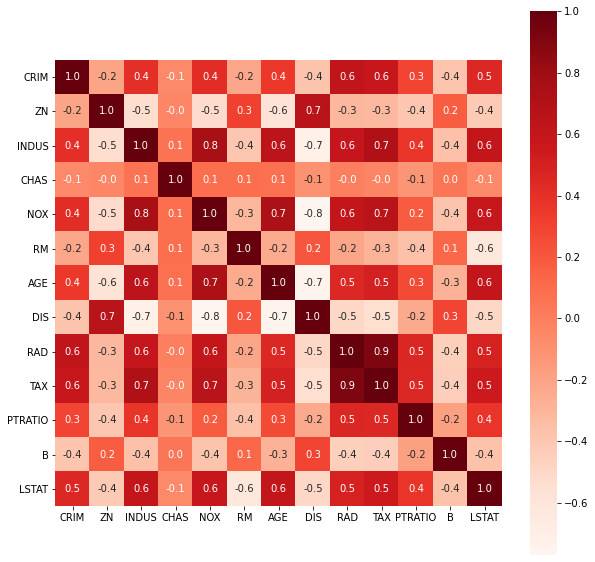

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Reds')

We can include all the features

C:\Users\appcloud\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


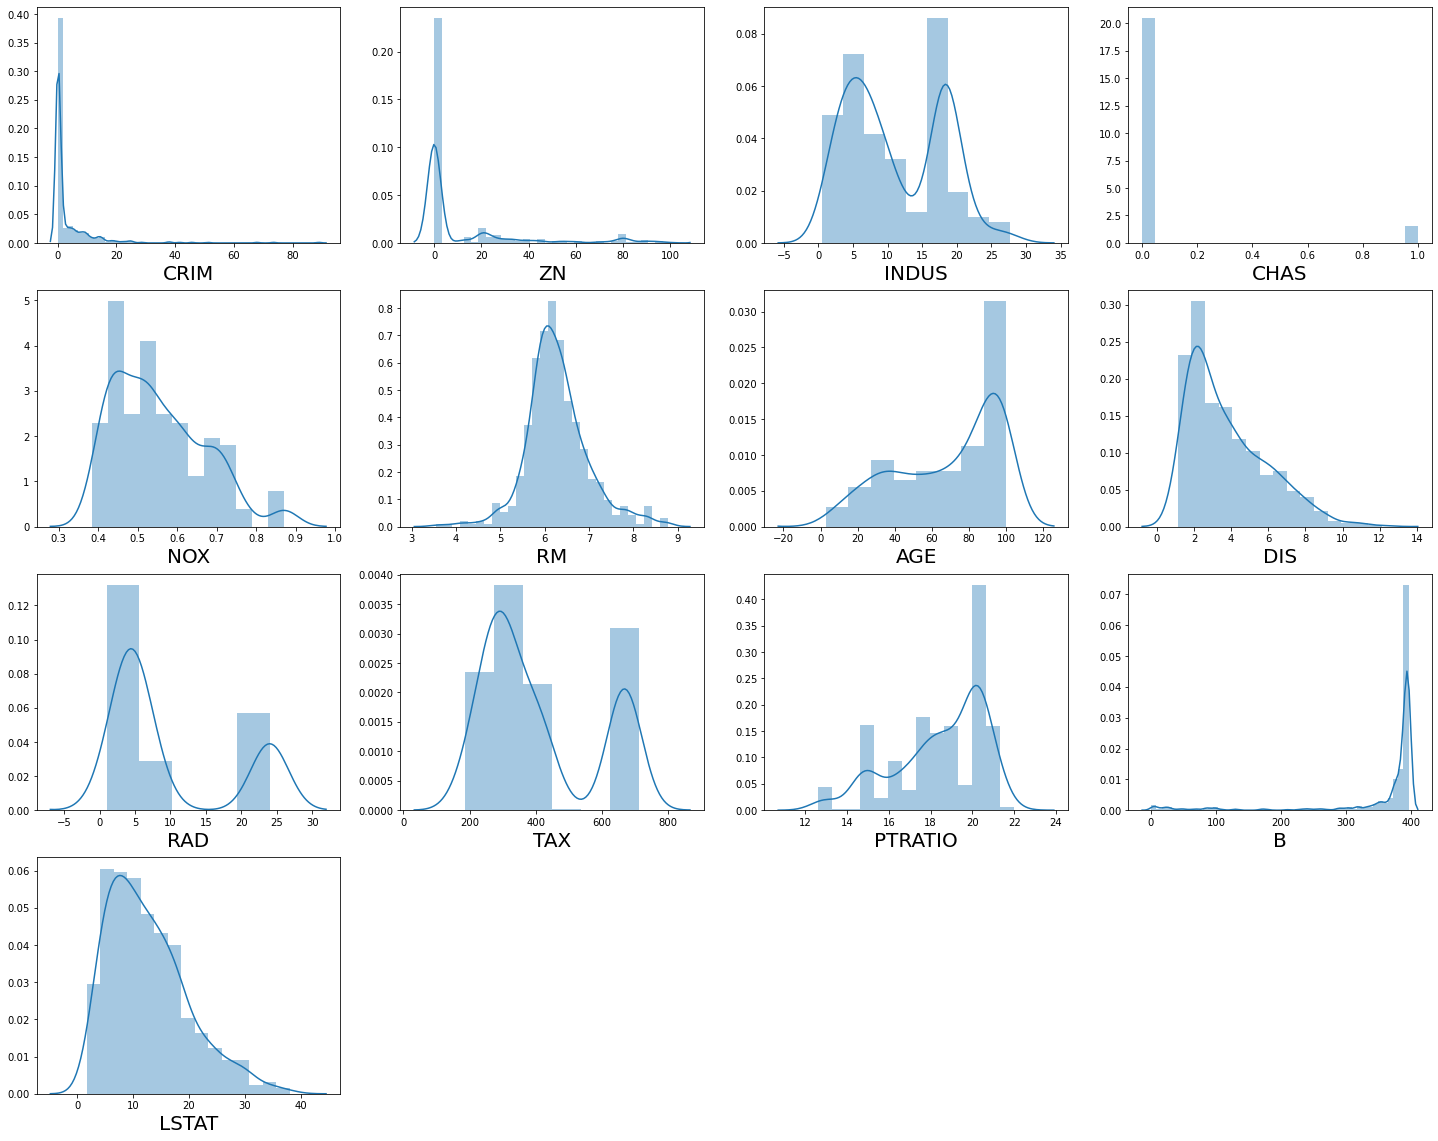

In [45]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in features:
    plt.subplot(4,4,plotnumber)
    sns.distplot(features[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [54]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [56]:
x_train,x_test,y_train,y_test = train_test_split(features_scaled, targets, test_size=0.3, random_state = 1)

### Using Decision Tree Regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [59]:
dt.score(x_train,y_train)

1.0

In [60]:
dt.score(x_test,y_test)

0.8020935610304845

In [66]:
grid_param = {
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']   
}

In [67]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=dt,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [68]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [69]:
best_parm = grid_search.best_params_

In [70]:
best_parm

{'max_depth': 22,
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'splitter': 'random'}

In [77]:
dt = DecisionTreeRegressor(criterion='mse', max_depth=22, min_samples_leaf=4, min_samples_split=10,splitter='random')
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=22, min_samples_leaf=4, min_samples_split=10,
                      splitter='random')

In [78]:
dt.score(x_train,y_train)

0.8492269052620877

In [79]:
dt.score(x_test,y_test)

0.8441963874369678

##### The Score of the Decision tree regressor model is ~ 84% 

### Using Ensemble Techninque

In [81]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [82]:
x_train,x_test,y_train,y_test = train_test_split(features_scaled, targets, test_size=0.3, random_state = 1)

* We know that we have achieved 84% accuracy with Decision tree regressor model.
* Now let's check with bagging technique

In [85]:
bag_dt = BaggingRegressor(DecisionTreeRegressor(criterion='mse', max_depth=22, min_samples_leaf=4, min_samples_split=10,splitter='random'))

In [86]:
bag_dt.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=22,
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      splitter='random'))

In [87]:
bag_dt.score(x_train,y_train)

0.8567508652858966

In [88]:
bag_dt.score(x_test,y_test)

0.8681871696642309

* We have achieved little more accuracy with bagging Techinique
* Now Let's use Random Forest Regressor

### Using Random Forest Regressor Model

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
x_train,x_test,y_train,y_test = train_test_split(features_scaled, targets, test_size=0.3, random_state = 1)

In [122]:
rf = RandomForestRegressor(n_estimators=25, random_state=1)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=25, random_state=1)

In [123]:
rf.score(x_train,y_train)

0.9780026958271918

In [124]:
rf.score(x_test,y_test)

0.9054798543134935

In [125]:
grid_param = {
    "n_estimators" : list(range(5,100,5)),
    'min_samples_leaf' : [1,2,3,4,5,6,7,8,9],
    'min_samples_split': [4,5,6,7,8,9,10],
    'max_features' : ['auto','log2']
}

In [126]:
grid_search = GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [127]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 2394 candidates, totalling 11970 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=25, random_state=1),
             n_jobs=-1,
             param_grid={'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95]},
             verbose=3)

In [128]:
best_parm = grid_search.best_params_

In [129]:
best_parm

{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 95}

In [130]:
rf = RandomForestRegressor(n_estimators=95, criterion='mse', max_features='auto',min_samples_split = 4,random_state=1)
rf.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=95, random_state=1)

In [131]:
rf.score(x_train,y_train)

0.9767180173803636

In [132]:
rf.score(x_test,y_test)

0.9061830001242589

In [134]:
import pickle

with open('modelForPredictionRF.sav', 'wb') as f:
    pickle.dump(rf,f)
